### 1. 라이브러리

In [1]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


print("tf ver : ",tf.__version__)
print("np ver : ",np.__version__)
print("plt ver : ",matplotlib.__version__)

tf ver :  2.4.0
np ver :  1.19.2
plt ver :  3.3.2


### 2. 데이터
    - 패션 MNIST 데이터셋
    - 10개 범주, 7만 개의 흑백이미지, 28*28 픽셀(28*28은 데이터 처리하는 단위>> 픽셀 중요)

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_code_objs',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setup_pyplot_info_docstrings',
 '_warn_if_gui_ou

In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Derss','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

### 3. 데이터 탐색

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

### 4. 데이터 전처리

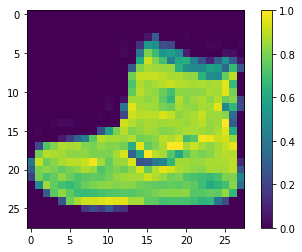

In [15]:
#plt.figure()  >지금은 안써도 됨(figure는 그림의 영역을 정해줄 때 씀)
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images/255.0
test_images = test_images/255.0

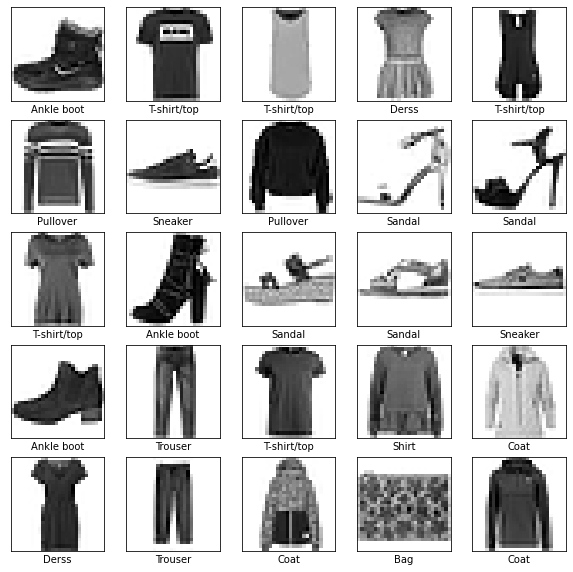

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

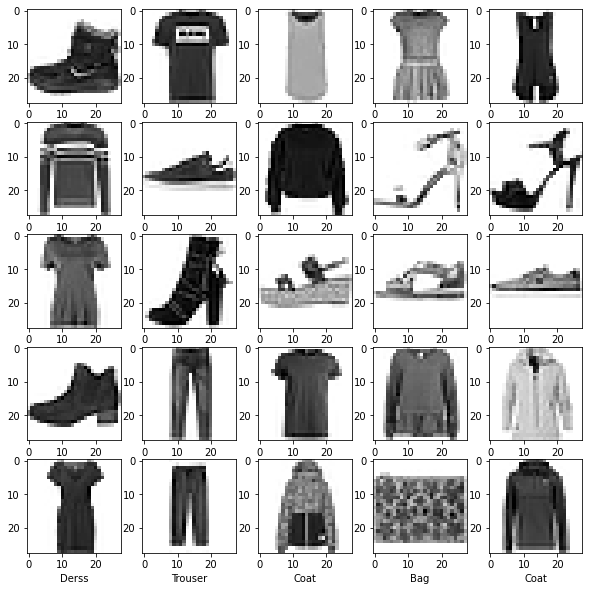

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])  >> 레이블을 안찍고 싶으면 삭제해도 됨
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

### 5. 모델구성

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'), #128개의 뉴런을 가진다
    keras.layers.Dense(10,activation='softmax') # 10개의 뉴런을 랜덤으로 가져온다.
])
#층을 쌓기

In [18]:
model.compile(optimizer='adam', # 데이터와 손실함수를 바탕으로 모델의 업데이트 방법 결정
             loss = 'sparse_categorical_crossentropy', # 모델의 오차 측정
             metrics=['accuracy']) # 훈련단계와 테스트단계 모니터링

#모델 훈련 기준을 정해주는 것

### 6. 모델 훈련

In [19]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6272 - accuracy: 0.7819
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3899 - accuracy: 0.8577
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3441 - accuracy: 0.8735
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3152 - accuracy: 0.8839
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2983 - accuracy: 0.8909


In [21]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\n테스트정확도:',test_acc)

313/313 - 1s - loss: 0.3567 - accuracy: 0.8724

테스트정확도: 0.8723999857902527


### 8. 예측모델 만들기

In [22]:
predictions = model.predict(test_images)

In [23]:
predictions[0]

array([8.8785697e-07, 1.6888652e-08, 8.6137838e-08, 6.3680911e-10,
       1.9858435e-07, 7.4401917e-03, 9.1179984e-08, 2.3581322e-02,
       4.8134843e-06, 9.6897238e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

In [30]:
class_names[9]

'Ankle boot'

In [26]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
        
    else:
        color ='red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color=color)

In [27]:
def plot_value_array(i,predictions_array, true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

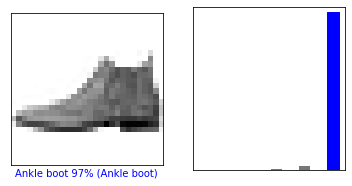

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

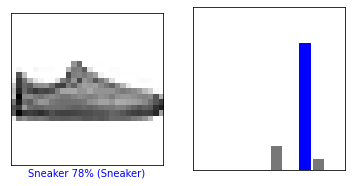

In [29]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()


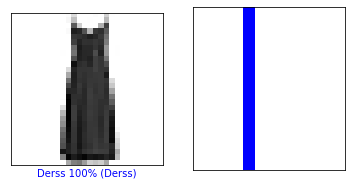

In [32]:
i=13
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()


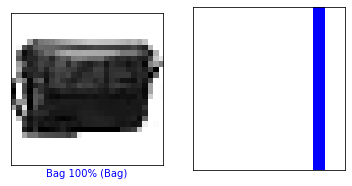

In [33]:
i=56
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()


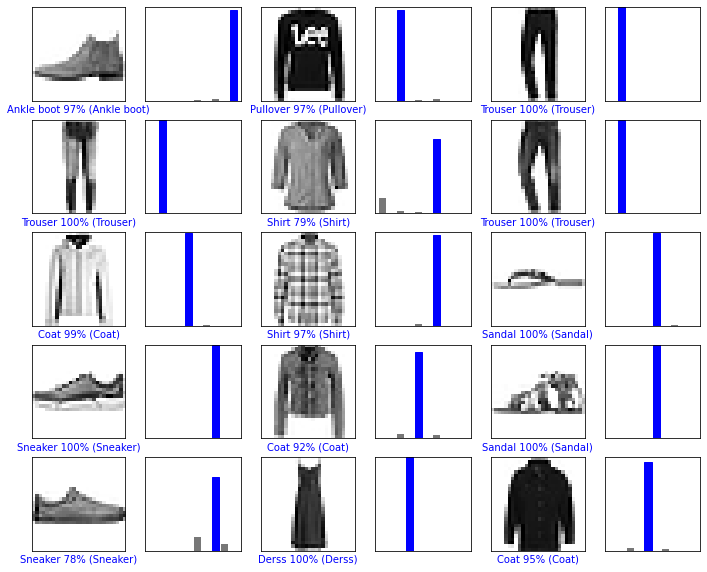

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)
    
plt.show()

### 9. 배포
    - 새로운 이미지 사진 등록
    - 이미지 사진 -> 28*28로 변환
    - np.array로 만든 후,(훈련데이터와 동일한 형식으로 만듦)
    - model predict(img)

In [36]:
img =test_images[0]

print(img.shape)

(28, 28)


In [38]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [40]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.8785691e-07 1.6888748e-08 8.6138158e-08 6.3680777e-10 1.9858413e-07
  7.4402010e-03 9.1180155e-08 2.3581341e-02 4.8134839e-06 9.6897227e-01]]


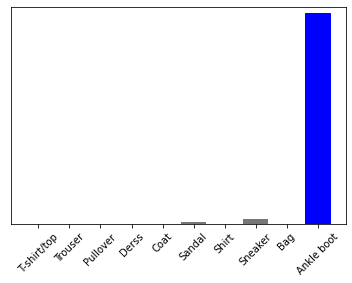

In [42]:
plot_value_array(0,predictions_single,test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)

In [44]:
np.argmax(predictions_single[0])

9